In [60]:
%load_ext autoreload
%autoreload 2

import sys
import os

#Import data from src
current_dir = os.getcwd()

project_root = os.path.abspath(os.path.join(current_dir, '..'))

if project_root not in sys.path:
    sys.path.append(project_root)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from src.data import time_based_train_test_split

In [62]:
# Load the dataset
file_path = "../data/tickets_data.csv"
data = pd.read_csv(file_path)

print("\nFirst 5 Rows of the Dataset:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nDataset Describe:")
print(data.describe())

print("\nUnique Values per Column:")
print(data.nunique())


First 5 Rows of the Dataset:
                   Created CancelTime        DepartureTime    BillID  \
0  2022-10-23 09:38:49.110        NaN  2022-11-02 23:59:00  39710203   
1  2022-08-15 14:51:43.160        NaN  2022-08-18 04:15:00  38689463   
2  2022-09-20 17:25:27.250        NaN  2022-09-21 11:00:00  39245173   
3  2022-06-25 11:32:53.980        NaN  2022-06-26 08:30:00  37957585   
4  2022-06-01 11:30:53.633        NaN  2022-06-02 23:00:00  37584530   

    TicketID  ReserveStatus    UserID   Male      Price  CouponDiscount  ...  \
0  1091777.0              5  122885.0   True  6600000.0         34425.0  ...   
1  1070902.0              5  876925.0   True  9500000.0             0.0  ...   
2  7624237.0              3  916640.0  False  2000000.0             0.0  ...   
3  2867547.0              2       NaN  False    40000.0             0.0  ...   
4  7212559.0              3       NaN   True  1130000.0             0.0  ...   

  Domestic              VehicleType  VehicleClass TripRe

## Data Translation

Translate city names from Persian to English

In [63]:
#get all unique values in From & To columns together
unique_locations = pd.unique(data[['From', 'To']].values.ravel('K'))
print(f"\nTotal Unique Locations in 'From' and 'To' columns: {len(unique_locations)}")
print(unique_locations)



Total Unique Locations in 'From' and 'To' columns: 319
['گرگان' 'مشهد' 'شیراز' 'تبریز' 'تهران' 'بروجرد' 'اصفهان' 'یزد' 'رشت'
 'بوشهر' 'اهواز' 'اراک' 'مشهد (خراسان )' 'قم' 'سیرجان' 'کرج' 'آبادان'
 'زنجان' 'بافق' 'شوشتر' 'اردبیل' 'نجف آباد (اصفهان )' 'خرم آباد (لرستان )'
 'بهبهان' 'خرمشهر' 'رودسر' 'چالوس' 'جهرم' 'کیش' 'کرمان' 'قزوین'
 'گنبدکاووس' 'گلپایگان' 'بندرعباس' 'عسلويه' 'جلفا' 'دیر' 'ارومیه' 'زاهدان'
 'کرمانشاه' 'بابلسر' 'کاشمر' 'گرمسار' 'هشتگرد' 'اقلید' 'لنجان' 'همدان'
 'بیرجند' 'شهرکرد' 'مراغه' 'ساری' 'رامسر' 'بروجن' 'قایم شهر' 'جوین'
 'برخوار' 'سنندج' 'طبس' 'ماسال' 'شاهرود' 'سمنان' 'خواف' 'دامغان' 'دورود'
 'اندیمشک' 'شاهرود (سمنان )' 'تنکابن' 'آستارا' 'گناباد' 'لامرد'
 'کنگان (بوشهر)' 'نور' 'نایروبی' 'استانبول' 'چابهار' 'قشم' 'عسلویه'
 'شهرضا' 'ایرانشهر' 'بابل' 'مهاباد (آذربایجان غربی )' 'ملایر' 'زواره'
 'میلان' 'تاکستان' 'خوی' 'محمدیه' 'خرم دره' 'کاشان' 'گناوه' 'دزفول'
 'تویسرکان' 'خلخال' 'سرخس' 'مرند' 'نیشابور' 'بشرویه' 'ایذه' 'حکاری'
 'کازرون' 'ایلام' 'میانه' 'بانه' 'نوشهر'

In [64]:
# The Great City Translation Dictionary
city_map = {
    # --- Major Cities ---
    'تهران': 'Tehran',
    'مشهد': 'Mashhad',
    'مشهد (خراسان )': 'Mashhad',
    'شیراز': 'Shiraz',
    'اصفهان': 'Isfahan',
    'تبریز': 'Tabriz',
    'اهواز': 'Ahvaz',
    'کرج': 'Karaj',
    'قم': 'Qom',
    'کرمانشاه': 'Kermanshah',
    'ارومیه': 'Urmia',
    'رشت': 'Rasht',
    'زاهدان': 'Zahedan',
    'همدان': 'Hamedan',
    'کرمان': 'Kerman',
    'یزد': 'Yazd',
    'اردبیل': 'Ardabil',
    'بندرعباس': 'Bandar Abbas',
    'اراک': 'Arak',
    'قزوین': 'Qazvin',
    'زنجان': 'Zanjan',
    'گرگان': 'Gorgan',
    'ساری': 'Sari',
    'دزفول': 'Dezful',
    'آبادان': 'Abadan',
    'بوشهر': 'Bushehr',
    'بجنورد': 'Bojnurd',
    'خرم آباد (لرستان )': 'Khorramabad',
    'خرم\u200cآباد': 'Khorramabad', 
    'سنندج': 'Sanandaj',
    'ایلام': 'Ilam',
    'یاسوج': 'Yasuj',
    'یاسوج (بویراحمد)': 'Yasuj',
    'شهرکرد': 'Shahr-e Kord',
    'سمنان': 'Semnan',
    'بیرجند': 'Birjand',
    
    # --- Islands & Special Zones ---
    'کیش': 'Kish Island',
    'قشم': 'Qeshm Island',
    'عسلويه': 'Asaluyeh',
    'عسلویه': 'Asaluyeh',
    'چابهار': 'Chabahar',

    # --- International Cities ---
    'استانبول': 'Istanbul',
    'دبی': 'Dubai',
    'نجف': 'Najaf',
    'بغداد': 'Baghdad',
    'پاریس': 'Paris',
    'لندن': 'London',
    'فرانکفورت': 'Frankfurt',
    'میلان': 'Milan',
    'رم': 'Rome',
    'آمستردام': 'Amsterdam',
    'تورنتو': 'Toronto',
    'نیویورک': 'New York',
    'مسکو': 'Moscow',
    'دوحه': 'Doha',
    'آنتالیا': 'Antalya',
    'ازمیر': 'Izmir',
    'آنکارا': 'Ankara',
    'وان': 'Van',
    'دنیزلی': 'Denizli',
    'آدانا': 'Adana',
    'آلانیا': 'Alanya',
    'آغری': 'Agri',
    'حکاری': 'Hakkari',
    'تفلیس': 'Tbilisi',
    'باتومی': 'Batumi',
    'ایروان': 'Yerevan',
    'باکو': 'Baku',
    'کویت': 'Kuwait City',
    'مسقط': 'Muscat',
    'ابوظبی': 'Abu Dhabi',
    'شارجه': 'Sharjah',
    'سلیمانیه': 'Sulaymaniyah',
    'کربلا': 'Karbala',
    'بمبئی': 'Mumbai',
    'چنای': 'Chennai',
    'سیالکوت': 'Sialkot',
    'بانکوک': 'Bangkok',
    'پکن': 'Beijing',
    'توکیو': 'Tokyo',
    'استکهلم': 'Stockholm',
    'گوتنبرگ': 'Gothenburg',
    'کپنهاگ': 'Copenhagen',
    'زوریخ': 'Zurich',
    'هامبورگ': 'Hamburg',
    'ورشو': 'Warsaw',
    'لیسبون': 'Lisbon',
    'فارو': 'Faro',
    'ونیز': 'Venice',
    'فلورانس': 'Florence',
    'کاتانیا': 'Catania',
    'صوفیه': 'Sofia',
    'نایروبی': 'Nairobi',
    'دوربان': 'Durban',
    'مونترآل': 'Montreal',

    # --- Other Iranian Cities ---
    'بروجرد': 'Borujerd',
    'سیرجان': 'Sirjan',
    'بافق': 'Bafq',
    'شوشتر': 'Shushtar',
    'نجف آباد (اصفهان )': 'Najafabad',
    'بهبهان': 'Behbahan',
    'خرمشهر': 'Khorramshahr',
    'رودسر': 'Rudsar',
    'چالوس': 'Chalus',
    'جهرم': 'Jahrom',
    'گنبدکاووس': 'Gonbad-e Kavus',
    'گلپایگان': 'Golpayegan',
    'جلفا': 'Jolfa',
    'دیر': 'Dayyer',
    'بابلسر': 'Babolsar',
    'کاشمر': 'Kashmar',
    'گرمسار': 'Garmsar',
    'هشتگرد': 'Hashtgerd',
    'اقلید': 'Eqlid',
    'لنجان': 'Lenjan',
    'مراغه': 'Maragheh',
    'رامسر': 'Ramsar',
    'بروجن': 'Borujen',
    'قایم شهر': 'Qaem Shahr',
    'قائمشهر': 'Qaem Shahr',
    'جوین': 'Joveyn',
    'برخوار': 'Borkhar',
    'طبس': 'Tabas',
    'ماسال': 'Masal',
    'شاهرود': 'Shahrud',
    'شاهرود (سمنان )': 'Shahrud',
    'خواف': 'Khaf',
    'دامغان': 'Damghan',
    'دورود': 'Dorud',
    'اندیمشک': 'Andimeshk',
    'تنکابن': 'Tonekabon',
    'آستارا': 'Astara',
    'گناباد': 'Gonabad',
    'لامرد': 'Lamerd',
    'کنگان (بوشهر)': 'Kangan',
    'نور': 'Nur',
    'شهرضا': 'Shahreza',
    'ایرانشهر': 'Iranshahr',
    'بابل': 'Babol',
    'مهاباد (آذربایجان غربی )': 'Mahabad',
    'مهاباد': 'Mahabad',
    'ملایر': 'Malayer',
    'زواره': 'Zavareh',
    'تاکستان': 'Takestan',
    'خوی': 'Khoy',
    'محمدیه': 'Mohammadiyeh',
    'خرم دره': 'Khorramdarreh',
    'کاشان': 'Kashan',
    'گناوه': 'Genaveh',
    'تویسرکان': 'Tuyserkan',
    'خلخال': 'Khalkhal',
    'سرخس': 'Sarakhs',
    'مرند': 'Marand',
    'نیشابور': 'Neyshabur',
    'بشرویه': 'Boshruyeh',
    'ایذه': 'Izeh',
    'کازرون': 'Kazerun',
    'میانه': 'Mianeh',
    'بانه': 'Baneh',
    'نوشهر': 'Nowshahr',
    'شاهین شهر': 'Shahin Shahr',
    'آمل': 'Amol',
    'جاجرم': 'Jajarm',
    'فردوس (خراسان )': 'Ferdows',
    'بم': 'Bam',
    'داراب (فارس )': 'Darab',
    'دشتستان': 'Dashtestan',
    'ماهشهر': 'Mahshahr',
    'بوکان': 'Bukan',
    'ازنا': 'Azna',
    'شهریار': 'Shahriar',
    'بندرانزلی': 'Bandar Anzali',
    'سراب (آذربایجان شرقی )': 'Sarab',
    'خمینی شهر': 'Khomeyni Shahr',
    'سقز': 'Saqez',
    'بندر لنگه': 'Bandar Lengeh',
    'بندرلنگه': 'Bandar Lengeh',
    'بافت': 'Baft',
    'آباده': 'Abadeh',
    'شاهین دژ': 'Shahin Dezh',
    'اردکان (یزد)': 'Ardakan',
    'اردکان': 'Ardakan',
    'بهشهر': 'Behshahr',
    'مسجدسلیمان': 'Masjed Soleyman',
    'خراسانک': 'Khorasanak',
    'اسفراین': 'Esfarayen',
    'میبد': 'Meybod',
    'محمودآباد (مازندران )': 'Mahmudabad',
    'تربت حیدریه': 'Torbat-e Heydarieh',
    'قوچان': 'Quchan',
    'نهاوند (همدان )': 'Nahavand',
    'نی ریز': 'Neyriz',
    'زرند': 'Zarand',
    'زرند (کرمان )': 'Zarand',
    'ساوه': 'Saveh',
    'خمین': 'Khomein',
    'خنج': 'Khonj',
    'اسلام آباد غرب': 'Islamabad-e Gharb',
    'رفسنجان': 'Rafsanjan',
    'گچساران': 'Gachsaran',
    'گچساران (دوگنبدان )': 'Gachsaran',
    'ورامین': 'Varamin',
    'جیرفت': 'Jiroft',
    'سلماس': 'Salmas',
    'نقاب': 'Neqab',
    'آزادور': 'Azadvar',
    'شوش': 'Shush',
    'کهگیلویه (دهدشت )': 'Kohgiluyeh',
    'لارستان': 'Larestan',
    'میناب': 'Minab',
    'شهر قدس (قلعه حسن خان)': 'Shahr-e Qods',
    'رباط کریم': 'Robat Karim',
    'پارس آباد': 'Pars abad',
    'زابل': 'Zabol',
    'ماکو': 'Maku',
    'آستانه اشرفیه': 'Astaneh-ye Ashrafiyeh',
    'شبستر': 'Shabestar',
    'لنگرود': 'Langrud',
    'طوالش': 'Talesh',
    'دلفان': 'Delfan',
    'فیروزکوه': 'Firuzkuh',
    'سبزوار': 'Sabzevar',
    'سعادت شهر': 'Saadat Shahr',
    'قرچك': 'Qarchak',
    'پیشوا': 'Pishva',
    'شیروان (خراسان )': 'Shirvan',
    'پاوه': 'Paveh',
    'شهربابک (کرمان )': 'Shahr-e Babak',
    'اهر': 'Ahar',
    'نکا': 'Neka',
    'کوهدشت (لرستان )': 'Kuhdasht',
    'آبیک': 'Abyek',
    'مشگین شهر': 'Meshgin Shahr',
    'سنقر': 'Sonqor',
    'گراش': 'Gerash',
    'مریوان': 'Marivan',
    'بجستان': 'Bajestan',
    'ملکان (ملک کندی )': 'Malekan',
    'عجب شیر': 'Ajab Shir',
    'بادرود': 'Badrud',
    'برداسکن': 'Bardaskan',
    'ایوان': 'Eyvan',
    'جمکران': 'Jamkaran',
    'میاندوآب': 'Miandoab',
    'جاسک': 'Jask',
    'ارجان': 'Arjan',
    'صومعه سرا': 'Someh Sara',
    'عباس آباد(مازندران )': 'Abbasabad',
    'دشتی (بوشهر)': 'Dashti',
    'بهاباد': 'Behabad',
    'سپیددشت': 'Sepid Dasht',
    'اسلامشهر': 'Islamshahr',
    'لار (فارس )': 'Lar',
    'تفرش': 'Tafresh',
    'نایین': 'Nain',
    'لاهیجان (گیلان )': 'Lahijan',
    'مهران (ایلام )': 'Mehran',
    'خوانسار': 'Khansar',
    'گیلانغرب': 'Gilan-e Gharb',
    'سمیرم': 'Semirom',
    'محلات': 'Mahallat',
    'ابهر': 'Abhar',
    'قاینات (قاین )': 'Qaen',
    'دشت آزادگان': 'Dasht-e Azadegan',
    'قلعه گنج': 'Ghaleye Ganj',
    'جم': 'Jam',
    'شیرگاه': 'Shirgah',
    'کلاله': 'Kalaleh',
    'الیگودرز': 'Aligudarz',
    'پیرانشهر': 'Piranshahr',
    'ری': 'Rey',
    'نطنز': 'Natanz',
    'دهلران': 'Dehloran',
    'قروه': 'Qorveh',
    'ارسنجان': 'Arsanjan',
    'اردستان': 'Ardestan',
    'قصرشیرین': 'Qasr-e Shirin',
    'فومن': 'Fuman',
    'کنگاور (کرمانشاه )': 'Kangavar',
    'ابرکوه (ابرقو)': 'Abarkuh',
    'ممسنی': 'Mamasani',
    'پلدختر': 'Pol-e Dokhtar',
    'فسا': 'Fasa',
    'منوجان (کرمان )': 'Manujan',
    'پارسیان': 'Parsian',
    'بیجار': 'Bijar',
    'دیلم': 'Deylam',
    'گرمی': 'Germi',
    'نیک شهر': 'Nik Shahr',
    'دیواندره': 'Divandarreh',
    'دره شهر': 'Darreh Shahr',
    'تربت جام': 'Torbat-e Jam',
    'نقده': 'Naqadeh',
    'مهدی شهر': 'Mehdishahr',
    'خاش': 'Khash',
    'آشتیان': 'Ashtian',
    'امیدیه (خوزستان )': 'Omidiyeh',
    'پل سفید': 'Pol-e Sefid',
    'پاسارگاد': 'Pasargad',
    'آبدانان': 'Abdanan',
    'سرایان': 'Sarayan',
    'دلیجان': 'Delijan',
    'اسد آباد(همدان )': 'Asadabad',
    'مهر (فارس)': 'Mohr',
    'سردشت (آذربایجان غربی )': 'Sardasht',
    'کهنوج': 'Kahnuj',
    'قیروکارزین': 'QiroKarzin',
    'مهریز': 'Mehriz',
    'سلسله': 'Selseleh',
    'خرم بید': 'Khorrambid',
    'شوط': 'Showt',
    'استهبان': 'Estahban',
    'دهگلان': 'Dehgolan',
    'بناب (آذربایجان شرقی )': 'Bonab',
    'سراوان (سیستان و بلوچستان )': 'Saravan',
    'رامهرمز': 'Ramhormoz',
    'خور(اصفهان)': 'Khur',
    'بندر ترکمن': 'Bandar Torkaman',
    'رزن': 'Razan',
    'فریدونشهر': 'Fereydunshahr',
    'چالدران': 'Chaldoran',
    'جوانرود': 'Javanrud',
    'عنبرآباد': 'Anbarabad',
}

# Apply the mapping
data['From'] = data['From'].map(city_map).fillna(data['From'])
data['To'] = data['To'].map(city_map).fillna(data['To'])

# Check for anything missed
print("Missed Cities in From:", data[~data['From'].isin(city_map.values())]['From'].unique())
print("Missed Cities in To:", data[~data['To'].isin(city_map.values())]['To'].unique())


print("\nFirst 5 Rows of the Dataset:")
print(data.head())

Missed Cities in From: []
Missed Cities in To: []

First 5 Rows of the Dataset:
                   Created CancelTime        DepartureTime    BillID  \
0  2022-10-23 09:38:49.110        NaN  2022-11-02 23:59:00  39710203   
1  2022-08-15 14:51:43.160        NaN  2022-08-18 04:15:00  38689463   
2  2022-09-20 17:25:27.250        NaN  2022-09-21 11:00:00  39245173   
3  2022-06-25 11:32:53.980        NaN  2022-06-26 08:30:00  37957585   
4  2022-06-01 11:30:53.633        NaN  2022-06-02 23:00:00  37584530   

    TicketID  ReserveStatus    UserID   Male      Price  CouponDiscount  ...  \
0  1091777.0              5  122885.0   True  6600000.0         34425.0  ...   
1  1070902.0              5  876925.0   True  9500000.0             0.0  ...   
2  7624237.0              3  916640.0  False  2000000.0             0.0  ...   
3  2867547.0              2       NaN  False    40000.0             0.0  ...   
4  7212559.0              3       NaN   True  1130000.0             0.0  ...   

  Dome

## Feature Engineering

### Checking Respected Feature Domains 

In [65]:
#Price
zero_price_count = (data['Price'] <= 0).sum()
print(f"Total tickets with Price <=0: {zero_price_count}")
print("\nCorresponding rows:\n", data[data['Price'] <= 0][['Price', 'CouponDiscount', 'Cancel']])

#dropping those values as they are outliers (all others have price equal or higher than 40000 rials)
data = data[data['Price'] > 0]
print("\nMaximum price:", data['Price'].max())
print("Minimum price:", data['Price'].min())

Total tickets with Price <=0: 2

Corresponding rows:
           Price  CouponDiscount  Cancel
6612 -1514000.0             0.0       1
8258        0.0             0.0       1

Maximum price: 383764590.0
Minimum price: 40000.0


In [66]:
neg_discount_count = (data['CouponDiscount'] < 0).sum()
print(f"Total tickets with CouponDiscount <0: {neg_discount_count}")
print("\nCorresponding rows:\n", data[data['CouponDiscount'] < 0][['Price', 'CouponDiscount', 'Cancel']])

higher_disc_count = (data['CouponDiscount'] > data['Price']).sum()
print(f"Total tickets with CouponDiscount > Price: {higher_disc_count}")
print("\nCorresponding rows:\n", data[data['CouponDiscount'] > data['Price']][['Price', 'CouponDiscount', 'Cancel']])

data = data[data['CouponDiscount'] >= 0]
data = data[data['CouponDiscount'] < data['Price']]


Total tickets with CouponDiscount <0: 1

Corresponding rows:
          Price  CouponDiscount  Cancel
10041  70000.0         -2000.0       0
Total tickets with CouponDiscount > Price: 9

Corresponding rows:
            Price  CouponDiscount  Cancel
2816     70000.0        220000.0       0
9780   1109000.0       1200000.0       0
11936    70000.0        110000.0       0
16773    70000.0        110000.0       0
26170    70000.0        110000.0       0
35858  1109000.0       1200000.0       0
45898  1078000.0       1200000.0       0
88361    70000.0        110000.0       0
99568    70000.0        110000.0       0


### Missing Values

In [67]:
missing_info = pd.DataFrame({
    'Missing Count': data.isnull().sum(),
    'Missing Percentage': (data.isnull().sum() / len(data)) * 100
})

print(missing_info.sort_values(by='Missing Percentage', ascending=False))

                      Missing Count  Missing Percentage
HashPassportNumber_p         100143           99.146577
CancelTime                    85681           84.828474
UserID                        58468           57.886243
HashEmail                     57927           57.350626
VehicleClass                  38441           38.058512
VehicleType                    7543            7.467947
ReserveStatus                     0            0.000000
TicketID                          0            0.000000
BillID                            0            0.000000
DepartureTime                     0            0.000000
Created                           0            0.000000
CouponDiscount                    0            0.000000
Price                             0            0.000000
Male                              0            0.000000
Domestic                          0            0.000000
To                                0            0.000000
From                              0            0

Remove useless columns

In [68]:
#remove HashPassportNumber_p, UserID, HashEmail, BillID, BuyerMobile,TicketID, CancelTime, ReserveStatus, VehicleClass, Male, CouponDiscount, VehicleType columns
data = data.drop(columns=['HashPassportNumber_p', 'UserID', 'HashEmail', 'BillID', 'BuyerMobile', 'TicketID', 'CancelTime', 'ReserveStatus', 'VehicleClass', 'Male', 'CouponDiscount', 'VehicleType'])

print("\nFirst 5 Rows of the Dataset:")
data.head()



First 5 Rows of the Dataset:


,Created,DepartureTime,Price,From,To,Domestic,TripReason,Vehicle,Cancel,NationalCode
0,2022-10-23 09:38:49.110,2022-11-02 23:59:00,6600000.0,Gorgan,Tehran,1,Work,Plane,0,477368495
1,2022-08-15 14:51:43.160,2022-08-18 04:15:00,9500000.0,Mashhad,Tehran,1,Int,Plane,0,15987669
2,2022-09-20 17:25:27.250,2022-09-21 11:00:00,2000000.0,Shiraz,Ahvaz,1,Work,Bus,0,667640412
3,2022-06-25 11:32:53.980,2022-06-26 08:30:00,40000.0,Tabriz,Jolfa,1,Int,Train,0,392476186
4,2022-06-01 11:30:53.633,2022-06-02 23:00:00,1130000.0,Tehran,Najafabad,1,Int,Bus,0,79497837


Handling Missing Values

In [69]:
# as there are a lot of different vehicle type we can not see any information between them and cancellation

#  VehicleType: Small missing %,  drop those rows
# data = data.dropna(subset=['VehicleType'])

# the unkown were related to the train and for economy or business class cancelation rate is not different so we decided to drop this feature

# VehicleClass: Too many missing, so we label them 'Unknown'
# data['VehicleClass'] = data['VehicleClass'].fillna('Unknown')

# Convert strings to datetime objects first
data['Created'] = pd.to_datetime(data['Created'])
data['DepartureTime'] = pd.to_datetime(data['DepartureTime'])

# Create "LeadTime" (How many days in advance did they book?)
data['LeadTime_Days'] = (data['DepartureTime'] - data['Created']).dt.total_seconds() / 86400

# #ALL THIS WILL BE DONE IN THE TRAIN/TEST SPLIT:
# # We want to know: "Is this user a high-risk person?"
# # We calculate the mean cancellation rate for each NationalCode
# user_stats = data.groupby('NationalCode')['Cancel'].agg(['mean', 'count']).reset_index()
# user_stats.columns = ['NationalCode', 'User_Cancel_Rate', 'User_Total_Tickets']

# # Merge this info back into the main dataset
# data = data.merge(user_stats, on='NationalCode', how='left')

# # NOW, we drop the NationalCode. The model will look at 'User_Cancel_Rate' instead.
# data = data.drop(columns=['NationalCode'])


data.head()

,Created,DepartureTime,Price,From,To,Domestic,TripReason,Vehicle,Cancel,NationalCode,LeadTime_Days
0,2022-10-23 09:38:49.110,2022-11-02 23:59:00,6600000.0,Gorgan,Tehran,1,Work,Plane,0,477368495,10.597348
1,2022-08-15 14:51:43.160,2022-08-18 04:15:00,9500000.0,Mashhad,Tehran,1,Int,Plane,0,15987669,2.557834
2,2022-09-20 17:25:27.250,2022-09-21 11:00:00,2000000.0,Shiraz,Ahvaz,1,Work,Bus,0,667640412,0.732323
3,2022-06-25 11:32:53.980,2022-06-26 08:30:00,40000.0,Tabriz,Jolfa,1,Int,Train,0,392476186,0.872986
4,2022-06-01 11:30:53.633,2022-06-02 23:00:00,1130000.0,Tehran,Najafabad,1,Int,Bus,0,79497837,1.478546


### Categorical Encoding
There are some features with 2 unique values, but have different types (string, bool). For consistency and easier future management, we turn them all in integers.
We also encode the `Vehicle` and `TripReason` features in integers.

In [70]:
# one-hot encoding

# we drop it as it has no effect on cancelation
# data['Male'] = data['Male'].astype(int)

categorical_columns = ['Vehicle', 'TripReason']

# Encoding categorical variables
encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(data[categorical_columns])

encoded_columns = encoder.get_feature_names_out(categorical_columns)
encoded_data = pd.DataFrame(encoded_array, columns=encoded_columns)
encoded_data.index = data.index

# Drop original categorical columns and concatenate with encoded columns
data_encoded = data.drop(columns=categorical_columns).reset_index(drop=True)
data = pd.concat([data_encoded, encoded_data], axis=1)

print("\nData After Encoding:")
print(data.head())


Data After Encoding:
                  Created       DepartureTime      Price     From         To  \
0 2022-10-23 09:38:49.110 2022-11-02 23:59:00  6600000.0   Gorgan     Tehran   
1 2022-08-15 14:51:43.160 2022-08-18 04:15:00  9500000.0  Mashhad     Tehran   
2 2022-09-20 17:25:27.250 2022-09-21 11:00:00  2000000.0   Shiraz      Ahvaz   
3 2022-06-25 11:32:53.980 2022-06-26 08:30:00    40000.0   Tabriz      Jolfa   
4 2022-06-01 11:30:53.633 2022-06-02 23:00:00  1130000.0   Tehran  Najafabad   

   Domestic  Cancel  NationalCode  LeadTime_Days  Vehicle_Bus  \
0       1.0     0.0   477368495.0      10.597348          0.0   
1       1.0     0.0    15987669.0       2.557834          0.0   
2       1.0     0.0   667640412.0       0.732323          1.0   
3       1.0     0.0   392476186.0       0.872986          0.0   
4       1.0     0.0    79497837.0       1.478546          1.0   

   Vehicle_InternationalPlane  Vehicle_Plane  Vehicle_Train  TripReason_Int  \
0                         0

### CouponDiscount -> Has_Discount

In [71]:
# as just 5% of total tickets have discount and they don't have any effect on the cancelation so we decide to drop it too

# data['Has_Discount'] = (data['CouponDiscount'] > 0).astype(int)
# data = data.drop(columns=['CouponDiscount'])

# Check the new distribution
# print(data['Has_Discount'].value_counts(normalize=True))


### Log of Price

<Axes: xlabel='Cancel', ylabel='Price'>

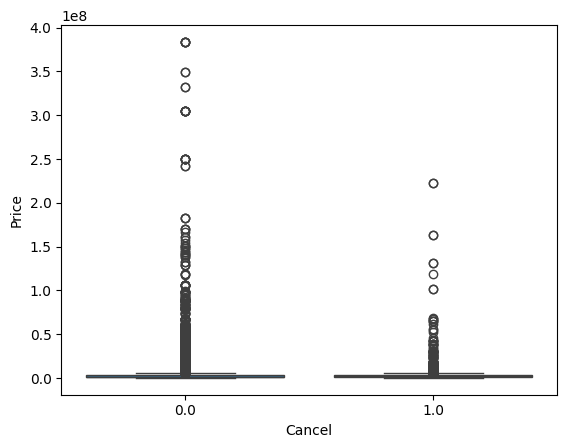

In [72]:
sns.boxplot(x='Cancel', y='Price', data=data)

Almost all the Price data is squished into the bottom 0.1, with a few dots stretching way far up. There are outliers: most tickets are cheap (under 5M), but there are a few massive outliers (maybe 100M+). These outliers squish your plot and can confuse linear models like Logistic Regression, so we log-transform `Price`.

<Axes: xlabel='Cancel', ylabel='LogPrice'>

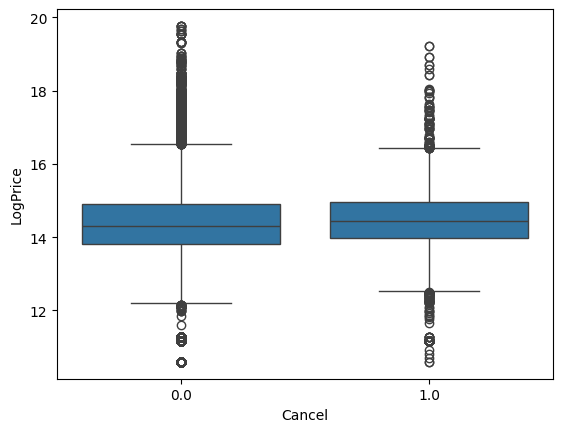

In [73]:
data['LogPrice']=np.log(data['Price'])
sns.boxplot(x='Cancel', y='LogPrice', data=data)

### DepartureTime feature extraction

We look for a pattern in month, day of the week and day of the month of `DepartureTime`, to determine which information to retain.

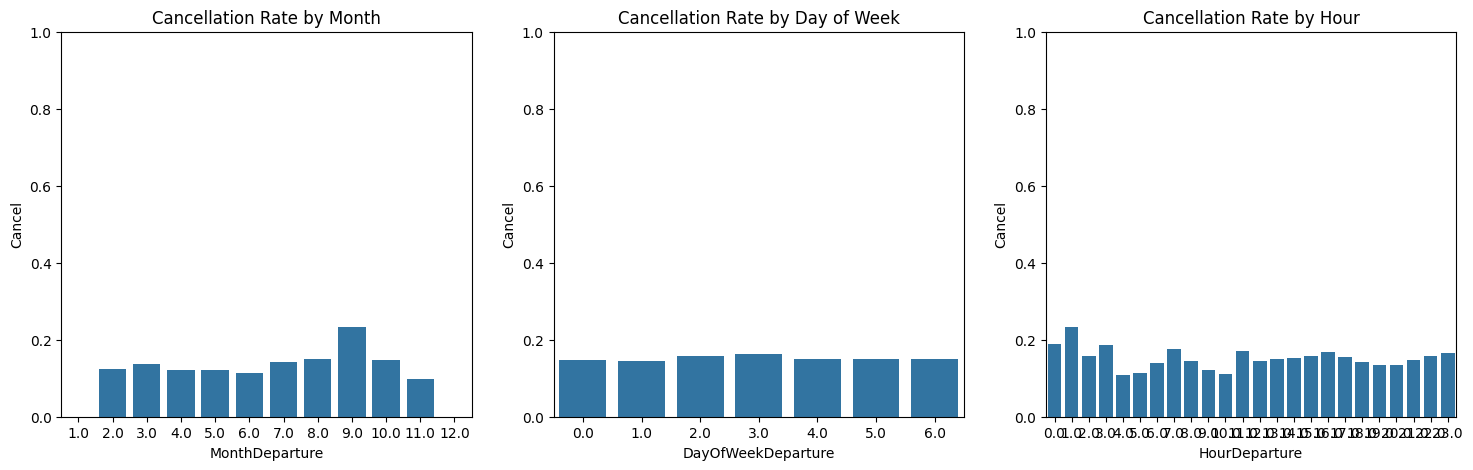

In [74]:
# Extract DepartureTime features
data['MonthDeparture'] = data['DepartureTime'].dt.month
data['DayOfWeekDeparture'] = data['DepartureTime'].dt.dayofweek
data['HourDeparture'] = data['DepartureTime'].dt.hour

# Plot Cancel Rate vs Feature
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot Month
sns.barplot(x='MonthDeparture', y='Cancel', data=data, ax=axes[0], errorbar=None)
axes[0].set_title('Cancellation Rate by Month')
axes[0].set_ylim(0, 1) # Fix y-axis to see true scale

# Plot Day of Week
sns.barplot(x='DayOfWeekDeparture', y='Cancel', data=data, ax=axes[1], errorbar=None)
axes[1].set_title('Cancellation Rate by Day of Week')
axes[1].set_ylim(0, 1)

# Plot Hour
sns.barplot(x='HourDeparture', y='Cancel', data=data, ax=axes[2], errorbar=None)
axes[2].set_title('Cancellation Rate by Hour')
axes[2].set_ylim(0, 1)

plt.show()

Results:
- Month - drop: it was outlier in september base on the country situation
- DayOfWeek - drop: this plot is almost perfectly flat, this feature adds no value.
- Hour - keep: there is a visible pattern, night hours 0-3 (midnight to 3 AM) have higher cancellation rates compared to the safer hours of 5–10 AM.

In [75]:
# Drop the columns
data = data.drop(columns=['DepartureTime', 'DayOfWeekDeparture','MonthDeparture'])

### Train and VehicleClass relation
it was check to find relation between train and vehicleClass after finding no relation we deleted the vehicleClass

In [76]:
#('Bus': 0, 'Train': 1, 'Plane': 2, 'InternationalPlane': 3)
#{False: 0, True: 1, 'Unknown': 2}
# print("Total VehicleClass = unknown:", (data['VehicleClass']==2).sum())
# print("Total Vehicle = train:", (data['Vehicle']== 1).sum())
# print("Trains with VehicleClass=unknown:", ((data['VehicleClass']==2) & (data['Vehicle']== 1)).sum())


In [77]:
# Isolate the two groups
# train_cancel_rate = data[data['VehicleClass'] == 2]['Cancel'].mean()
# standard_cancel_rate = data[data['VehicleClass'] == 0]['Cancel'].mean()

# # Print the comparison
# print(f"Cancellation Rate for Trains (Missing Class): {train_cancel_rate:.2%}")
# print(f"Cancellation Rate for Standard Vehicles (Class 0): {standard_cancel_rate:.2%}")


We introduce dummy variables instead of `Vehicle`, so binary variables like `Type_Plane` and `Type_IntPlane`, so that trains are represented by `VehicleClass`=2 (unknown) and busses is the baseline type, when both `Type_Plane` and `Type_IntPlane` are 0 and `VehicleClass` is different than 2

In [78]:
# One-Hot Encoding

# dummies = pd.get_dummies(data['Vehicle'], prefix='Vehicle')

# data = pd.concat([data, dummies], axis=1)

# data.rename(columns={'Vehicle_0': 'Vehicle_Bus', 'Vehicle_1': 'Vehicle_Train', 'Vehicle_2': 'Vehicle_Plane', 'Vehicle_3': 'Vehicle_IntPlane'}, inplace=True)

# data = data.drop(columns=['Vehicle_Bus', 'Vehicle_Train', 'Vehicle'])

# Updated Dataset

In [79]:
#FINAL CHECK
print(data.isnull().sum())
print("\nRemaining Columns:", data.columns.tolist())

print("\nDataset Info:")
print(data.info())

Created                       12
Price                         12
From                          12
To                            12
Domestic                      12
Cancel                        12
NationalCode                  12
LeadTime_Days                 12
Vehicle_Bus                   12
Vehicle_InternationalPlane    12
Vehicle_Plane                 12
Vehicle_Train                 12
TripReason_Int                12
TripReason_Work               12
LogPrice                      12
HourDeparture                 12
dtype: int64

Remaining Columns: ['Created', 'Price', 'From', 'To', 'Domestic', 'Cancel', 'NationalCode', 'LeadTime_Days', 'Vehicle_Bus', 'Vehicle_InternationalPlane', 'Vehicle_Plane', 'Vehicle_Train', 'TripReason_Int', 'TripReason_Work', 'LogPrice', 'HourDeparture']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101017 entries, 0 to 101016
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------  

In [80]:
train_df, test_df = time_based_train_test_split(data,train_size=1)
print(train_df.info())
train_df.head()

Sorting data by Created...
Split complete. Training: 101017 rows, Test: 0 rows.
Global Training Cancel Rate: 0.1516
Found 0 new users in Test set
               Route  Route_Rate
0     Shiraz to Yazd    0.187766
1  Shiraz to Zahedan    0.114594
2  Shiraz to Zahedan    0.114594
3  Shiraz to Zahedan    0.114594
4    Tehran to Rasht    0.171042
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101017 entries, 0 to 101016
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Price                       101005 non-null  float64
 1   From                        101005 non-null  object 
 2   To                          101005 non-null  object 
 3   Domestic                    101005 non-null  float64
 4   Cancel                      101005 non-null  float64
 5   LeadTime_Days               101005 non-null  float64
 6   Vehicle_Bus                 101005 non-null  float64
 7   Vehicle_Internatio

,Price,From,To,Domestic,Cancel,LeadTime_Days,Vehicle_Bus,Vehicle_InternationalPlane,Vehicle_Plane,Vehicle_Train,TripReason_Int,TripReason_Work,LogPrice,HourDeparture,User_Cancel_Rate,User_Total_Tickets,Route,From_Rate,To_Rate,Route_Rate
0,1000000.0,Shiraz,Yazd,1.0,0.0,0.121696,0.0,0.0,0.0,1.0,1.0,0.0,13.815511,23.0,0.0,1.0,Shiraz to Yazd,0.116661,0.148227,0.187766
1,1415000.0,Shiraz,Zahedan,1.0,0.0,0.759619,1.0,0.0,0.0,0.0,0.0,1.0,14.162640,15.0,0.0,1.0,Shiraz to Zahedan,0.116661,0.137619,0.114594
2,1415000.0,Shiraz,Zahedan,1.0,0.0,0.759619,1.0,0.0,0.0,0.0,0.0,1.0,14.162640,15.0,0.0,1.0,Shiraz to Zahedan,0.116661,0.137619,0.114594
3,1415000.0,Shiraz,Zahedan,1.0,0.0,0.759619,1.0,0.0,0.0,0.0,1.0,0.0,14.162640,15.0,0.0,1.0,Shiraz to Zahedan,0.116661,0.137619,0.114594
4,830000.0,Tehran,Rasht,1.0,0.0,0.109960,0.0,0.0,0.0,1.0,0.0,1.0,13.629181,23.0,0.0,2.0,Tehran to Rasht,0.155381,0.148246,0.171042


In [81]:
print(test_df.info())
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       0 non-null      float64
 1   From                        0 non-null      object 
 2   To                          0 non-null      object 
 3   Domestic                    0 non-null      float64
 4   Cancel                      0 non-null      float64
 5   LeadTime_Days               0 non-null      float64
 6   Vehicle_Bus                 0 non-null      float64
 7   Vehicle_InternationalPlane  0 non-null      float64
 8   Vehicle_Plane               0 non-null      float64
 9   Vehicle_Train               0 non-null      float64
 10  TripReason_Int              0 non-null      float64
 11  TripReason_Work             0 non-null      float64
 12  LogPrice                    0 non-null      float64
 13  HourDeparture               0 non-null      flo

,Price,From,To,Domestic,Cancel,LeadTime_Days,Vehicle_Bus,Vehicle_InternationalPlane,Vehicle_Plane,Vehicle_Train,TripReason_Int,TripReason_Work,LogPrice,HourDeparture,User_Cancel_Rate,User_Total_Tickets,Route,From_Rate,To_Rate,Route_Rate


In [82]:
#Save the two datasets
output_dir = "../data/"

os.makedirs(output_dir, exist_ok=True)

# 3. Save the DataFrames to CSV
# index=False prevents pandas from saving the row numbers as a separate column
data.to_csv(os.path.join(output_dir, "updated_data.csv"), index=False)
train_df.to_csv(os.path.join(output_dir, "train_time_based.csv"), index=False)
test_df.to_csv(os.path.join(output_dir, "test_time_based.csv"), index=False)